In [36]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

<h3>Store CSV into DataFrame</h3>

In [37]:
csv_file = "arrest_data.csv"
arrest_data_df = pd.read_csv(csv_file)
arrest_data_df.head()

,DATE,TEAM,NAME,POSITION,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,3/27/2017,SEA,Trevone Boykin,QB,Arrested,Drugs,"Accused of marijuana possession, public intoxi...",Resolution undetermined.
1,3/26/2017,CHI,Deiondre Hall,CB,Arrested,Disorderly conduct,"Accused of disorderly conduct, public intoxica...",Resolution undetermined.
2,3/26/2017,GB,Makinton Dorleant,CB,Arrested,Police interference,Accused of interfence after scuffle outside of...,Resolution undetermined.
3,3/7/2017,KC,Demetrius Harris,TE,Arrested,Drugs,Suspected of felony marijuana possession as pa...,Resolution undetermined.
4,3/5/2017,LAR,Ethan Westbrooks,DT,Arrested,Domestic violence,Suspected of domestic violence in Sacramento a...,Resolution undetermined.


<h3>Create new data with select columns</h3>

In [38]:
# Create a filtered dataframe from specific columns
new_arrest_data_df = arrest_data_df[['NAME', 'DATE', 'CATEGORY', 'DESCRIPTION']].copy()

# Rename the column headers
new_arrest_data_df = new_arrest_data_df.rename(columns={"NAME": "player_name",
                                                          "DATE": "date_of_arrest",
                                                          "CATEGORY": "category",
                                                          "DESCRIPTION": "description"})

new_arrest_data_df.dropna(inplace=True)

# Set index
new_arrest_data_df.set_index("date_of_arrest", inplace=True)

new_arrest_data_df.head()

,player_name,category,description
date_of_arrest,,,
3/27/2017,Trevone Boykin,Drugs,"Accused of marijuana possession, public intoxi..."
3/26/2017,Deiondre Hall,Disorderly conduct,"Accused of disorderly conduct, public intoxica..."
3/26/2017,Makinton Dorleant,Police interference,Accused of interfence after scuffle outside of...
3/7/2017,Demetrius Harris,Drugs,Suspected of felony marijuana possession as pa...
3/5/2017,Ethan Westbrooks,Domestic violence,Suspected of domestic violence in Sacramento a...


<h3>Store JSON data into a DataFrame</h3>

In [39]:
json_file = "profiles.json"
player_profile_df = pd.read_json(json_file)
player_profile_df.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


<h3>Clean DataFrame</h3>

In [40]:
# Create a filtered dataframe from specific columns
new_player_profile_df = player_profile_df[["player_id","name", "current_team", "position"]].copy()

# Rename the column headers
new_player_profile_df = new_player_profile_df.rename(columns={"player_id": "id",
                                                              "name": "player_name",
                                                              "current_team": "team"})

new_player_profile_df.dropna(inplace=True)

# Set index
new_player_profile_df.set_index("id", inplace=True)
                                                          
new_player_profile_df.head()

,player_name,team,position
id,,,
355,Kiko Alonso,Miami Dolphins,ILB
2701,Preston Brown,Buffalo Bills,ILB
3966,Frank Clark,Seattle Seahawks,DE
19449,Emmanuel Sanders,Denver Broncos,WR
17858,Bilal Powell,New York Jets,RB


<h3>Connect to local database</h3>

In [41]:
rds_connection_string = "postgres:1234@localhost:5432/nfl_arrest_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

<h3>Check for tables</h3>

In [42]:
engine.table_names()

['arrest_table', 'player_profile', 'combine_table']

<h3>Use pandas to load csv converted DataFrame into database</h3>

In [43]:
new_arrest_data_df.to_sql(name='arrest_table', con=engine, if_exists='append', index=False)

<h3>Use pandas to load json converted DataFrame into database</h3>

In [44]:
new_player_profile_df.to_sql(name='player_profile', con=engine, if_exists='append', index=False)

<h3>Confirm data has been added by querying the arrest_table</h3>

In [45]:
pd.read_sql_query('select * from arrest_table', con=engine).head()

,player_name,category,description
0,Trevone Boykin,Drugs,"Accused of marijuana possession, public intoxi..."
1,Deiondre Hall,Disorderly conduct,"Accused of disorderly conduct, public intoxica..."
2,Makinton Dorleant,Police interference,Accused of interfence after scuffle outside of...
3,Demetrius Harris,Drugs,Suspected of felony marijuana possession as pa...
4,Ethan Westbrooks,Domestic violence,Suspected of domestic violence in Sacramento a...


<h3>Confirm data has been added by querying the player_profile</h3>

In [46]:
pd.read_sql_query('select * from player_profile', con=engine).head()

,player_name,team,position
0,Robert Blackmon,Seattle Seahawks,DB
1,Dean Wells,Seattle Seahawks,LB
2,Kiko Alonso,Buffalo Bills,ILB
3,Steve Ramsey,New Orleans Saints,QB
4,Cory Nelms,None,CB


<h3>Joining both datasets into 1 dataset</h3>

In [47]:
combined_ds = new_arrest_data_df.merge(new_player_profile_df,left_on='player_name', right_on='player_name')

In [58]:
combined_ds.head()

,player_name,category,description,team,position
0,Demetrius Harris,Drugs,Suspected of felony marijuana possession as pa...,Kansas City Chiefs,TE
1,David Parry,"DUI, resisting arrest","Suspected of stealing golf cart, driving drunk...",New Orleans Saints,NT
2,Darrelle Revis,Assault,Accused of aggravated assault after altercatio...,Kansas City Chiefs,DB
3,Adam Jones,Assault,Accused of poking hotel security employee in t...,Cincinnati Bengals,DB
4,Adam Jones,Disorderly conduct,He was the passenger in a car pulled over for ...,Cincinnati Bengals,DB


<h3>Use pandas to load csv converted DataFrame into database</h3>

In [49]:
combined_ds.to_sql(name='combine_table', con=engine, if_exists='append', index=False)

<h3>Confirm data has been added by querying the player_profile</h3>

In [50]:
pd.read_sql_query('select * from combine_table', con=engine).head()

,player_name,category,description,team,position
0,Trevone Boykin,Drugs,"Accused of marijuana possession, public intoxi...",None,QB
1,Makinton Dorleant,Police interference,Accused of interfence after scuffle outside of...,None,CB
2,Demetrius Harris,Drugs,Suspected of felony marijuana possession as pa...,None,TE
3,David Parry,"DUI, resisting arrest","Suspected of stealing golf cart, driving drunk...",Indianapolis Colts,NT
4,Matt Elam,Drugs,"Pulled over in Miami Beach, accused of possess...",Baltimore Ravens,SS


In [92]:
# Team with most arrest
team_arrests = combined_ds["team"].value_counts()

#team_arrests

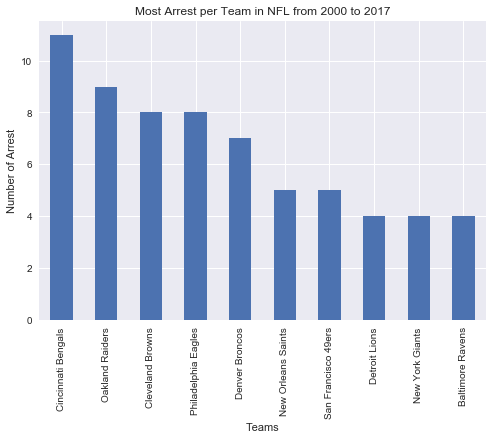

In [88]:
# Plotting graph showing which team has the most arrest
team_arrests.head(10).plot.bar()
plt.title('Most Arrest per Team in NFL from 2000 to 2017')
plt.ylabel('Number of Arrest')
plt.xlabel('Teams')
plt.savefig('Images/team_most_arrest.PNG', bbox_inches = 'tight')

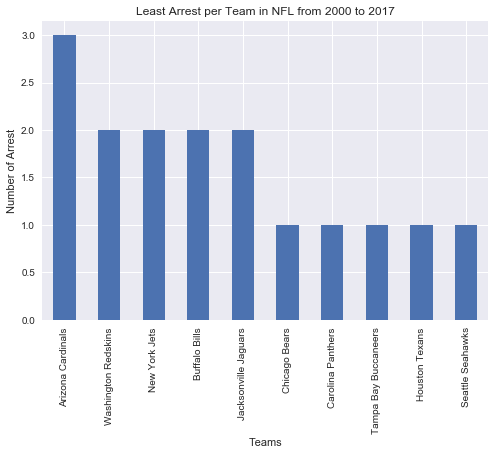

In [89]:
# Plotting graph showing which team has the least arrest
team_arrests.tail(10).plot.bar()
plt.title('Least Arrest per Team in NFL from 2000 to 2017')
plt.ylabel('Number of Arrest')
plt.xlabel('Teams')
plt.savefig('Images/team_least_arrest.PNG', bbox_inches = 'tight')

In [93]:
# Plotting graph showing which player has the most arrest
player_arrests = combined_ds["player_name"].value_counts()

#player_arrests

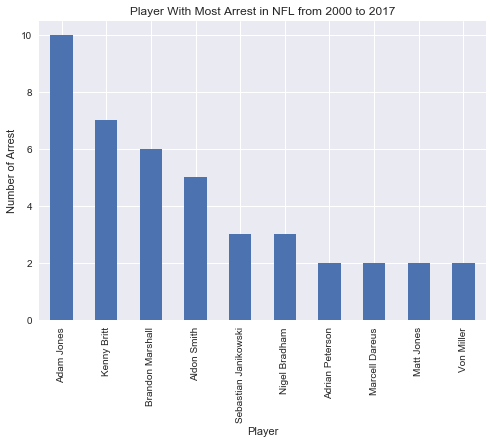

In [90]:
player_arrests.head(10).plot.bar()
plt.title('Player With Most Arrest in NFL from 2000 to 2017')
plt.ylabel('Number of Arrest')
plt.xlabel('Player')
plt.savefig('Images/player_with_most_arrest.PNG', bbox_inches = 'tight')

In [94]:
# Plotting graph showing which are the top arrest category
category_arrests = combined_ds["category"].value_counts()

#category_arrests

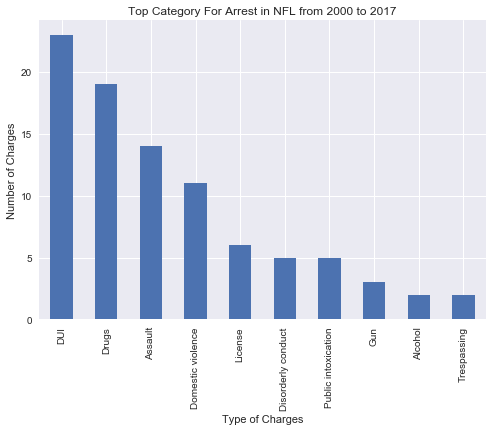

In [91]:
category_arrests.head(10).plot.bar()
plt.title('Top Category For Arrest in NFL from 2000 to 2017')
plt.ylabel('Number of Charges')
plt.xlabel('Type of Charges')
plt.savefig('Images/top_10_charges.PNG', bbox_inches = 'tight')